# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [2]:
print(f"X shape: {X.shape}")
print(f"Y shape: {y.shape}")

X shape: (70000, 784)
Y shape: (70000,)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [3]:
X[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

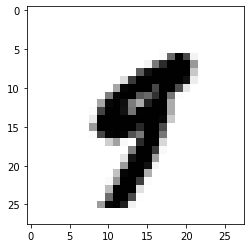

In [4]:
import matplotlib.pyplot as plt
import matplotlib

reshape = X.reshape((70000,28,28))

plt.imshow(reshape[36000], cmap = matplotlib.cm.binary, interpolation = 'nearest')


### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [5]:
print(y[36000])

9


### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [8]:
X_train= X[:60000]
y_train= y[:60000]

X_test= X[60000:]
y_test= y[60000:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(y_train)
print(y_test)



(60000, 784)
(60000,)
(10000, 784)
(10000,)
['5' '0' '4' ... '5' '6' '8']
['7' '2' '1' ... '4' '5' '6']


### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [9]:
from sklearn.model_selection import train_test_split

y_train=np.where(y_train!='5', 0, 5)
y_test=np.where(y_test!='5', 0, 5)


print(y_train)
print(y_train)



[5 0 0 ... 5 0 0]
[5 0 0 ... 5 0 0]


### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [10]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()

model.fit(X_train, y_train)

model.predict(X_train)

/home/adja/miniconda3/envs/ironhack_data/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([5, 0, 0, ..., 5, 0, 0])

### Does the classifier predict correctly the 36000th digit we picked before?

In [13]:
n = 36000

model.predict_proba(X_train)[n]

import pandas as pd

df=pd.DataFrame(model.predict_proba(X_train), columns=model.classes_)
df.loc[36000]

0    0.997681
5    0.002319
Name: 36000, dtype: float64

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [14]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [15]:
never_5_clf.fit(X_train, y_train)

never_5_clf.predict(X_train)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [17]:
from sklearn.metrics import recall_score

print(recall_score(y_true=y_test, y_pred=never_5_clf.predict(X_test),pos_label=5))

recall_score(y_true=y_test, y_pred=model.predict(X_test),pos_label=5)


0.0


0.8352017937219731

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
'''no olvidar comentar'''

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

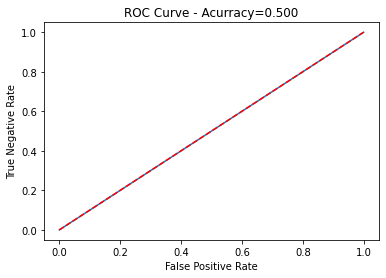

In [25]:
y_pred=never_5_clf.predict(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=5)
a = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Negative Rate')
plt.title(f'ROC Curve - Acurracy={a:.3f}')
plt.show();

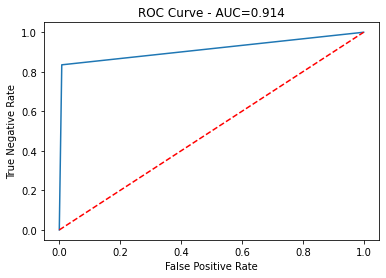

In [24]:
y_pred=model.predict(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=5)
a = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Negative Rate')
plt.title(f'ROC Curve - Acurracy={a:.3f}')
plt.show();



### Now find the roc_auc_score for each. 

In [ ]:
y_pred=never_5_clf.predict(X_test)

print(roc_auc_score(y_test, y_pred))

y_pred=lr.predict(X_test)

roc_auc_score(Y_test, y_pred)

### What does this metric tell you? Which classifier works better with this metric in mind?